## Yash Garg | LGM | Data Science 
Task-02
Stock Market Prediction And Forecasting Using Stacked LSTM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
#read the file 
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
db_stock = pd.read_csv(url)
db_stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
#Data Preprocessing
print(db_stock.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


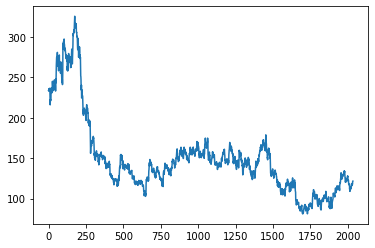

In [9]:
db_stock1 = db_stock.reset_index()['Close']
plt.plot(db_stock1)

In [16]:
db_stock1 = scaler.fit_transform(np.array(db_stock1).reshape(-1,1))
db_stock1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [18]:
#splitting the Dataset
train_size = int(len(db_stock1)*0.75)
test_size = len(db_stock1) - train_size
train_data, test_data = db_stock1[0:train_size,:],db_stock1[train_size:len(db_stock1),:1]

In [21]:
#Preprocess the data
def create_dataset(dataset, time_step=1):
  x, y = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    x.append(a)
    y.append(dataset[i+time_step,0])
  return np.array(x),np.array(y)


time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

#reshaping input for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [23]:
import tensorflow as tf

In [25]:
#create the stacked LSTM model
model = Sequential()
#adding layers
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
23/23 [==============================] - 11s 240ms/step - loss: 0.0409 - val_loss: 0.0088
Epoch 2/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0043 - val_loss: 8.8741e-04
Epoch 3/100
23/23 [==============================] - 4s 156ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/100
23/23 [==============================] - 3s 132ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 3s 141ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 4s 182ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 3s 143ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 3s 135ms/step - loss: 0.0013 - val_loss: 9.6954e-04
Epoch 9/100
23/23 [==============================] - 3s 144ms/step - loss: 0.0011 - val_loss: 9.8095e-04
Epoch 10/100
23/23 [==============================] - 3s 149ms/step - loss: 0.

23/23 [==============================] - 4s 169ms/step - loss: 3.0752e-04 - val_loss: 2.2976e-04
Epoch 77/100
23/23 [==============================] - 3s 145ms/step - loss: 3.4645e-04 - val_loss: 3.5273e-04
Epoch 78/100
23/23 [==============================] - 3s 150ms/step - loss: 2.8837e-04 - val_loss: 2.5918e-04
Epoch 79/100
23/23 [==============================] - 4s 182ms/step - loss: 3.2850e-04 - val_loss: 3.6175e-04
Epoch 80/100
23/23 [==============================] - 3s 140ms/step - loss: 2.9377e-04 - val_loss: 2.2357e-04
Epoch 81/100
23/23 [==============================] - 4s 189ms/step - loss: 2.7818e-04 - val_loss: 3.0194e-04
Epoch 82/100
23/23 [==============================] - 3s 146ms/step - loss: 2.6916e-04 - val_loss: 2.9996e-04
Epoch 83/100
23/23 [==============================] - 4s 179ms/step - loss: 2.8486e-04 - val_loss: 2.6389e-04
Epoch 84/100
23/23 [==============================] - 4s 172ms/step - loss: 2.4807e-04 - val_loss: 3.0366e-04
Epoch 85/100
23/23 [===

In [29]:
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)

test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)

#calculate RSME (Root Mean Square Error)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


163.64187425564384

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

106.28194097168141

In [31]:
look_back=100
trainPredictionPlot = np.empty_like(db_stock1) #shifting training predictions
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictionPlot = np.empty_like(db_stock1) #shifting test predictions
testPredictionPlot[:, :] = np.nan
testPredictionPlot[len(train_predict)+(look_back*2)+1:len(db_stock)-1, :] = test_predict

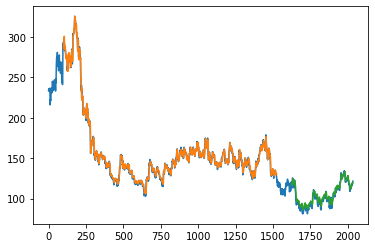

In [32]:
plt.plot(scaler.inverse_transform(db_stock1))
plt.plot(trainPredictionPlot)
plt.plot(testPredictionPlot)
plt.show()

In [41]:
len(test_data)

509

In [47]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
#Prediction for next 20 days
from numpy import array

final_output=[]
n_steps=100
i=1
while(i<=20):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        ypred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,ypred))
        temp_input.extend(ypred[0].tolist())
        temp_input=temp_input[1:]
        final_output.extend(ypred.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        ypred = model.predict(x_input, verbose=0)
        print(ypred[0])
        temp_input.extend(ypred[0].tolist())
        print(len(temp_input))
        final_output.extend(ypred.tolist())
        i=i+1
    

print(final_output)

[0.16710125]
101
2 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

9 day output [[0.1798577]]
10 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.

18 day output [[0.19030261]]
19 day input [0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.16710125 0.169514
 0.17123736 0.17274036

In [51]:
day_new = np.arange(1,101)
day_pred = np.arange(101,121)

In [54]:
df3 = db_stock1.tolist()
df3.extend(final_output)

In [55]:
len(db_stock1)

2035

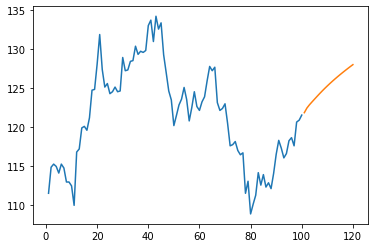

In [57]:
plt.plot(day_new, scaler.inverse_transform(db_stock1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(final_output))